# **Aquí se encuentra el análisis de los datos para realizar una estrategia que identifique los flujos mas importantes de importaciones/exportaciones.**

### _La Dirección de Synergy Logistics ha solicitado realizar una propuesta que permita enfocar las prioridades de la estrategia operativa 2021; para ello, se plantea analizar la viabilidad de 3 opciones de enfoque:_ 
#### <i>Estos 3 enfoques son :</i> 
* ```Rutas de importación y exportación.```

* ```Medio de transporte utilizado.```

* ```Valor total de importaciones y exportaciones.```

*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************

> #### **_Se importan las librerias y la base de datos para comenzar el análisis  :_** 

In [189]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt


synergy_ubicacion = 'REPORTE_02_CIRILO_PEÑA_LIZBETH\synergy_logistics_database.csv'
synergy_bd = pd.read_csv(synergy_ubicacion, index_col = 'register_id')
synergy_bd.info() #asegurarse que no falte ningun dato y ver que tipo de datos contiene la base. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19056 entries, 1 to 19056
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   direction       19056 non-null  object
 1   origin          19056 non-null  object
 2   destination     19056 non-null  object
 3   year            19056 non-null  int64 
 4   date            19056 non-null  object
 5   product         19056 non-null  object
 6   transport_mode  19056 non-null  object
 7   company_name    19056 non-null  object
 8   total_value     19056 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.5+ MB


*************************************************************************************************************
## **1.-** Las 10 Rutas más demandadas.
### (En base a los flujos de exportacion/importacion).
*************************************************************************************************************



> #### **_Tomando en cuenta que las rutas estan conformadas por:_**
>> * Dirección (_Direction_)
>> * Origen (_Origin_)
>> * Destino (_Destination_)
>> * Modo de transporte (_Transport_Mode_)


In [265]:
tab_rutas = synergy_bd[['direction', 'origin', 'destination', 'transport_mode', 'total_value']]
rutas = tab_rutas.groupby(['direction', 'origin', 'destination', 'transport_mode']).count()
rutas = rutas.rename(columns = {'total_value' : 'count'}).sort_values(by = ['count'], ascending = False)


+ #### **Las rutas que no se repiten en importaciones como en exportaciones son:**

In [266]:
rutas.head(10)

count
direction origin      destination transport_mode       
Exports   South Korea Vietnam     Sea               497
          USA         Netherlands Sea               436
          Netherlands Belgium     Road              374
          China       Mexico      Air               330
          Japan       Brazil      Sea               306
          Germany     France      Road              299
          South Korea Japan       Sea               279
Imports   Singapore   Thailand    Sea               273
Exports   Australia   Singapore   Sea               273
          Canada      Mexico      Rail              261

+ #### **Se separaran las rutas por importaciones y exportaciones, para obtener una mejor visualizacion de como son los flujos:**

> ##### **EXPORTACIONES** 

In [267]:
exp = rutas.xs('Exports')
#agregar una columna para los nombres de las columnas dentro de las gráficas
exp['Ruta'] = exp.index.to_list()
display("Rutas de Exportacion:" , exp.head(3))

# Ordenar para que se vean mejor las etiquetas en las graficas
def top_rutas(texto):
    nombre = f'{texto[0]}/{texto[1]}\n{texto[2]}'
    return nombre
exp['Ruta'] = exp['Ruta'].apply(top_rutas)

# Nueva columna, con el color de los medios de transporte
exp['transporte'] = exp.index.to_list()

# Función para cambiar el contenido de la columna
def medio_transp(text):
    return text[2]
# Aplicamos la transformación
exp['transporte'] = exp['transporte'].apply(medio_transp)



'Rutas de Exportacion:'

count                          Ruta
origin      destination transport_mode                                     
South Korea Vietnam     Sea               497   (South Korea, Vietnam, Sea)
USA         Netherlands Sea               436       (USA, Netherlands, Sea)
Netherlands Belgium     Road              374  (Netherlands, Belgium, Road)

>> + #### **Estas son las 10 rutas más demandas de las Exportaciones:**

<AxesSubplot:xlabel='Ruta', ylabel='count'>

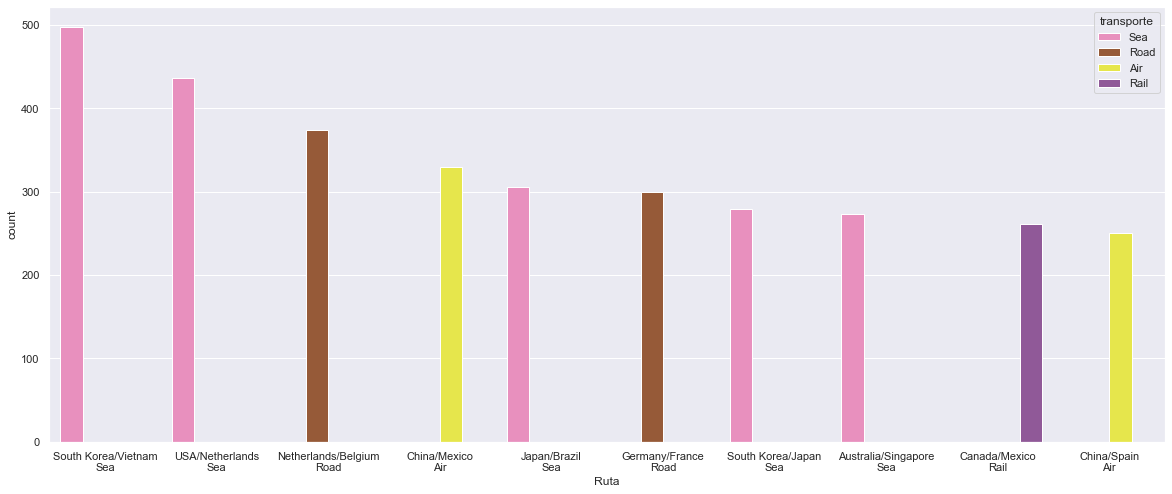

In [264]:
sns.set(palette ='Set1_r',rc={"figure.figsize": (20, 8)})  #width=8, height=4
sns.barplot(data=exp.head(10), x='Ruta', y='count', hue='transporte')

| _Ruta_ | _Transporte_ | 
|:---------|:---------:|
|1.- Corea del Sur/Vietnam | Mar |
|2.- E.U/Paises Bajos | Mar |
|3.-Paises Bajos/Bélgica |Carretera |
|4.-China/México |Aire |
|5.-Japon/Brasil |Mar |
|6.-Alemania/Francia |Carretera |
|7.-Corea del Sur/Japon |Mar     |
|8.-Australia/Singapur |Mar  |
|9.-Canada/México   |Tren     |
|10.-China/España |Mar |

> ##### **IMPORTACIONES**

In [194]:
imp = rutas.xs('Imports')
#agregar una columna para los nombres de las columnas dentro de las gráficas
imp['Ruta'] = imp.index.to_list()
display("Rutas de Importacion:", imp.head(3))

# Ordenar para que se vean mejor las etiquetas en las graficas
def rutas_top(text):
    nomb = f'{text[0]}/{text[1]}\n{text[2]}'
    return nomb

imp['Ruta'] = imp['Ruta'].apply(rutas_top)

# Nueva columna, con el color de los medios de transporte
imp['transporte'] = imp.index.to_list()

# Función para cambiar el contenido de la columna
def medio_trans(texto):
    return texto[2]
# Aplicamos la transformación
imp['transporte'] = imp['transporte'].apply(medio_trans)


'Rutas de Importacion:'

count                        Ruta
origin    destination transport_mode                                   
Singapore Thailand    Sea               273  (Singapore, Thailand, Sea)
Germany   China       Sea               233       (Germany, China, Sea)
China     Japan       Air               210         (China, Japan, Air)

>> #### **Estas son las 10 rutas más demandas de las Importaciones :**

<AxesSubplot:xlabel='Ruta', ylabel='count'>

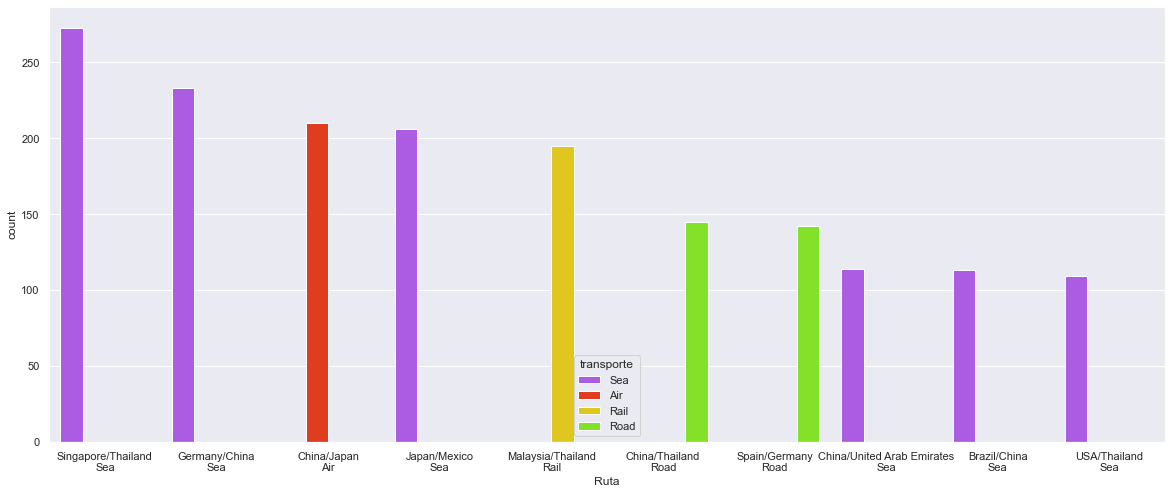

In [195]:
sns.set(palette ='gist_ncar_r', rc={"figure.figsize": (20, 8)})  #width=8, height=4
sns.barplot(data=imp.head(10), x='Ruta', y='count', hue='transporte')


| _Ruta_ | _Transporte_ | 
|:---------|:---------:|
|1.- Singapur/Tailandia | Mar |
|2.- Alemania/China | Mar |
|3.-China/Japon |Aire |
|4.-Japon/México |Mar |
|5.-Malasia/Tailandia |Tren |
|6.-China/Tailandia |Carretera |
|7.-España/Alemania |carretera
|8.-China/Emiratos Araber Unidos |Mar  |
|9.-Brasil/China  |Mar     |
|10.-E.U/Tailandia |Mar |

### Se puede recalcar que dentro de ambos analisis, tanto a las importaciones como las exportaciones, el mayor flujo se mueve por mar es dentro de oriente, pues para las importaciones, las tres principales solo por mencionar son: **Singapur/Tailandia, Alemania/China y China/Japon** 

### Para el caso de las exportaciones, las tres principales son: **Corea del Sur/Vietnam, E.U/Paises Bajos y Paises Bajos/Bélgica**.
### 

*************************************************************************************************************
*************************************************************************************************************
## **2.-** Los tres medios de transporte más utilizados.
### (En base a los flujos de exportacion/importacion).
*************************************************************************************************************


> ##### **MEDIO DE TRANSPORTE MÁS UTILIZADO EN LAS IMPORTACIONES**


                count  Ruta  transporte
transport_mode                         
Air                 5     5           5
Rail                7     7           7
Road                5     5           5
Sea                35    35          35


<AxesSubplot:xlabel='transport_mode', ylabel='transporte'>

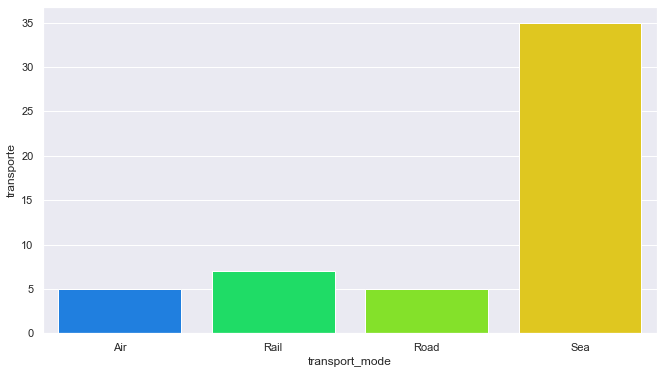

In [268]:
transpor = imp.groupby('transport_mode').count()
print(transpor)

sns.set(palette ='gist_ncar', rc={"figure.figsize": (11, 6)}) #width=8, height=4
sns.barplot(data=transpor.head(10),  x=transpor.index, y='transporte')


> ##### **MEDIO DE TRANSPORTE MÁS UTILIZADO EN LAS EXPORTACIONES**

                count  Ruta  transporte
transport_mode                         
Air                20    20          20
Rail               34    34          34
Road               23    23          23
Sea                86    86          86


<AxesSubplot:xlabel='transport_mode', ylabel='transporte'>

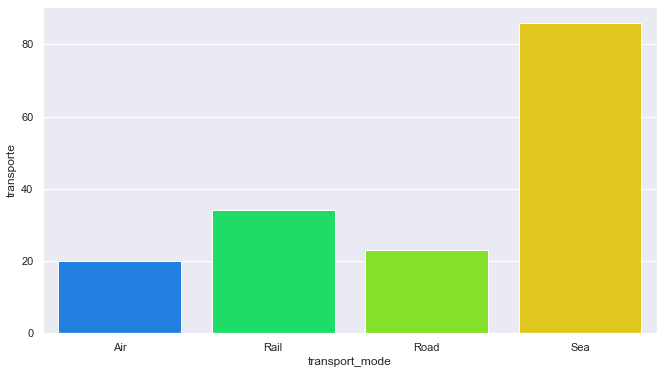

In [197]:
transp = exp.groupby('transport_mode').count()
print(transp)

sns.set(palette ='gist_ncar', rc={"figure.figsize": (11, 6)}) #width=8, height=4
sns.barplot(data=transp.head(10),  x=transp.index, y='transporte')


### Para el caso de los medios de transporte, es más que obvio que la mayoria de los argamentos son **movidos por mar**, tanto para importaciones como exportaciones, pues más barato y mes eficiente en cuanto a volumenesde carga.

*************************************************************************************************************
*************************************************************************************************************
## **3.-** Paises que generan el 80% del valor total de las importaciones.
### (En base a los flujos de exportacion/importacion).
*************************************************************************************************************

In [259]:
#Se Agrupa por direction
co_value = synergy_bd.groupby(['direction', 'origin']).sum()
co_value = co_value.sort_values(by=['total_value'], ascending=False)

# Separamos en dos df
imp_valor = co_value.xs('Exports')
exp_valor = co_value.xs('Imports')

totals = synergy_bd['direction'].value_counts()
rutas = synergy_bd.drop_duplicates(subset='origin')

#Suma del total de las importaciones/exportaciones
paises = synergy_bd['total_value'].sum()
print("\n\n\tEl total del valor de las exportaciones es (100%): \t\n")
display(paises)



	El total del valor de las exportaciones es (100%): 	



215691298000

> #### **80% DEL VALOR GENERADO DE PARTE DE LAS IMPORTACIONES:**

In [260]:
imp_valor['porcentaje_acumulado'] = 100 * (imp_valor.total_value.cumsum() / imp_valor.total_value.sum())
print("\n\n\tLa acumulacion del porcetaje al cual atribuye cada pais: \t\n\n ")
display(imp_valor)
imp_t80 = imp_valor[imp_valor["porcentaje_acumulado"] < 80]
print("\n\n\tLos paises que abarcan hasta el 80% son: \t\n\n" )
display(imp_t80)



	La acumulacion del porcetaje al cual atribuye cada pais: 	

 


<ipython-input-260-1991d0d3aa5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_valor['porcentaje_acumulado'] = 100 * (imp_valor.total_value.cumsum() / imp_valor.total_value.sum())


year  total_value  porcentaje_acumulado
origin                                                    
China           3343248  32977046000             20.589640
France          1854137  18614332000             32.211736
USA             2953071  18355306000             43.672105
South Korea     2287853  14621146000             52.801004
Russia          1545745  13223000000             61.056953
Japan           2535907  11948976000             68.517449
Germany         2612813  11343233000             75.599741
Canada          1216314  10684000000             82.270433
Italy           1133092   5366684000             85.621191
Netherlands     1605885   4120369000             88.193796
Spain            595534   3418000000             90.327868
United Kingdom  1758189   2777612000             92.062105
India           1139441   2626000000             93.701682
Belgium          490399   2588000000             95.317533
Brazil           798422   2274000000             96.737334
Switzerland      502589   2154000000             98.082211
Australia       1741175   1650000000             99.112410
Mexico          1557323   1419755000             99.998852
Austria          882281      1155000             99.999573
Singapore        532152       684000            100.000000



	Los paises que abarcan hasta el 80% son: 	




year  total_value  porcentaje_acumulado
origin                                                 
China        3343248  32977046000             20.589640
France       1854137  18614332000             32.211736
USA          2953071  18355306000             43.672105
South Korea  2287853  14621146000             52.801004
Russia       1545745  13223000000             61.056953
Japan        2535907  11948976000             68.517449
Germany      2612813  11343233000             75.599741

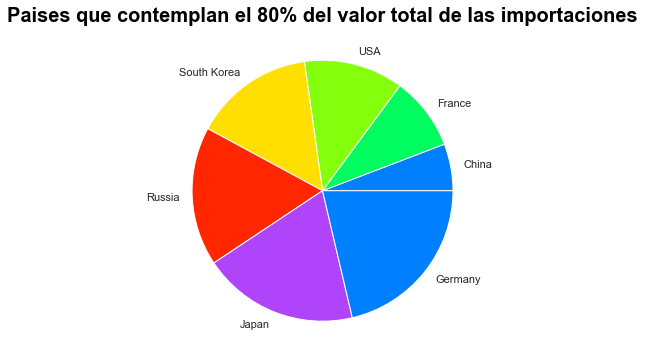

In [253]:
plt.pie(imp_t80['porcentaje_acumulado'], labels = top_80.index)
plt.title("Paises que contemplan el 80% del valor total de las importaciones", color = 'Black', fontweight = 'bold', fontsize = '20')
plt.show()

### Como se muestra en el gráfico, el valor concentrado del 80% dentro de las importaciones se encuentra mayormente en: 
> + China
> + France
> + USA
> + South Korea
> + Russia
> + Japan
> + Germany

> #### **80% DEL VALOR GENERADO DE PARTE DE LAS EXPORTACIONES:**

In [261]:
exp_valor['porcentaje_acumulado'] = 100 * (exp_valor.total_value.cumsum() / exp_valor.total_value.sum())
print("\n\n\tLa acumulacion del porcetaje al cual atribuye cada pais: \t\n\n ")
display(exp_valor)

exp_t80 = exp_valor[exp_valor["porcentaje_acumulado"] < 80]
print("\n\n\tLos paises que abarcan hasta el 80% son: \t\n\n" )
display(exp_t80)



	La acumulacion del porcetaje al cual atribuye cada pais: 	

 


<ipython-input-261-d017007bdd61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_valor['porcentaje_acumulado'] = 100 * (exp_valor.total_value.cumsum() / exp_valor.total_value.sum())


year  total_value  porcentaje_acumulado
origin                                                          
China                 1240848  12233000000             22.030327
Japan                  897766   8094000000             36.606757
USA                    758592   5291000000             46.135283
Mexico                 738306   4621000000             54.457211
Germany                744786   4250000000             62.111007
Singapore              550813   4017000000             69.345195
South Korea            324757   3889000000             76.348869
Malaysia               401360   3560000000             82.760049
Spain                  369012   3001000000             88.164530
France                 340719   1316000000             90.534505
Italy                  173492   1268000000             92.818038
Australia              205632    920000000             94.474860
Russia                  84798    851000000             96.007420
Canada                  94876    569000000             97.032128
Vietnam                 36360    540000000             98.004610
Brazil                 240337    489000000             98.885247
United Arab Emirates    40400    371000000             99.553378
United Kingdom         116986    248000000            100.000000



	Los paises que abarcan hasta el 80% son: 	




year  total_value  porcentaje_acumulado
origin                                                 
China        1240848  12233000000             22.030327
Japan         897766   8094000000             36.606757
USA           758592   5291000000             46.135283
Mexico        738306   4621000000             54.457211
Germany       744786   4250000000             62.111007
Singapore     550813   4017000000             69.345195
South Korea   324757   3889000000             76.348869

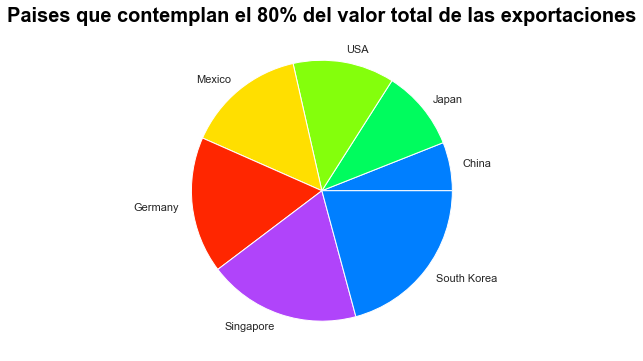

In [258]:
plt.pie(exp_t80['porcentaje_acumulado'], labels = exp_t80.index)
plt.title("Paises que contemplan el 80% del valor total de las exportaciones", color = 'Black', fontweight = 'bold', fontsize = '20')
plt.show()

### Como se muestra en el gráfico, el valor concentrado del 80% dentro de las importaciones se encuentra mayormente en: 
> + China 
> + Japan
> + USA
> + Mexico
> + Germany
> + Singapore
> + South Korea	

*************************************************************************************************************
# **_CONCLUSIONES:_**
*************************************************************************************************************

### En base al analisis gráfico anterior, de los distintos enfoques, llego a la conclusion que tanto las rutas que comercian entre los paises de occidentes son claves para conectar con rutas que su destino es llegar a México y Estados Unidos. No descuidar negocios con rutas en paises claves como lo son **China, Japon, Vietnam y Corea del Sur.** Así como en occidente con **Estados Unidos y México.**
### En cuento al medio de transporte, se es claro que **la mayoria de la carga se mueve por mar.** Y es la manera mas productiva de hacerlo, **el transporte menos usado es aire y tren,** puesto que el transporte aereo es muy costoso, pero indispensable para cierto tipo de carga fragil, **el trasporte que se podria contemplar a reducir sería por tren,** puesto que podria adaptarse por carretera. 
### Por ultimo, la concentracion del valor de las cargas en importaciones se vio principalmente y no de extrañarse que vengan de oriente poues son **Corea del Sur, Rusia y Japon** mientras que en las exportaciones **México, Alemania y Singapur** son las principales.
